In [50]:
import os, sys
os.chdir('/home/koritskiy/rqc/ferrimagnet')
from datetime import datetime
import shutil


from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt



from confusion_learning.energy import *
from confusion_learning.modules_2D_ferro import *

import jupyternotify

%load_ext autoreload
%autoreload 2

%load_ext jupyternotify
%autonotify -a 5

import plotly.graph_objects as go
from plotly.subplots import make_subplots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify


In [98]:
path = 'confusion_learning/results/2d/2020-08-18-22:33:42/'
Z = np.loadtxt(path + 'Z.dat', dtype=float)
X = np.loadtxt(path + 'X.dat', dtype=float)
H = np.loadtxt(path + 'H.dat', dtype=float)

In [82]:
theory = np.loadtxt('confusion_learning/phase_diag_ascii.dat', dtype=float)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [83]:
Z_th = theory[:,2].reshape(501, 3000)

In [99]:
fig = go.Figure()

# Calculated w-shape
fig.add_trace(
    go.Contour(
        z=Z.T,
        x=X,
        y=H,
        ncontours=37,
        colorbar=dict(
            title='Accuracy', # title here
            titleside='right',
            titlefont=dict(
                size=14,
                family='Arial, sans-serif'
            )
        )
    )
)

# # Theoretical phase transition
# fig.add_trace(
#     go.Contour(
#         z=Z_th.T,
#         x=np.linspace(X[0], X[-1], 501),
#         y=np.linspace(H[0], H[-1], 3000),
#         ncontours=37,
#         contours_coloring='none'
#     )
# )

fig.update_layout(
    width=800,
    height=800, 
    title='W-shape',
    xaxis_title="x",
    yaxis_title="H",
)

fig.update_xaxes(nticks=12)
fig.update_yaxes(nticks=12)

fig.show()

In [112]:
fig = go.Figure()

fig.add_trace(
    go.Surface(
        z=Z.T,
        x=X,
        y=H,
        colorbar=dict(
            title='Accuracy', # title here
            titleside='right',
            titlefont=dict(
                size=14,
                family='Arial, sans-serif'
            )
        )
    )
)

# fig.update_traces(
#     contours_z=dict(show=True, 
#                     usecolormap=True,
#                     highlightcolor="limegreen",
#                     project_z=True))

fig.update_layout(
    width=900,
    height=900,
    title='3D W-shape',
    scene=dict(
        xaxis_title="x",
        yaxis_title="H",
        zaxis_title='Accuracy',
        xaxis=dict(
            nticks=20
        ),
        yaxis=dict(
            nticks=20
        )
    )
)

fig.show()

In [115]:
Harray = [10, 45, 90]
fig = go.Figure()

for h in Harray:
    fig.add_trace(
        go.Scatter(
            y = Z[:, h],
            x = X,
            name = "H = " + str(h)
        ),
    )

fig.update_layout(
    width=800,
    height=800, 
    title='W-shape срезы для фиксированных H',
    xaxis_title="x",
    yaxis_title="Accuracy",
)

fig.update_xaxes(nticks=26)
fig.update_yaxes(nticks=10)

In [28]:
def save(path, params, data):
    try:
        shutil.rmtree(path)
    except OSError:
        pass
    os.mkdir(path)
    
    #params
    f = open(path + "/info.txt","w+")
    for p in params:
        f.write(p + ': '+ str(params[p]) + '\n')
    f.close()
    
    #data
    for d in data:
        np.savetxt(path + d + '.dat', data[d])

In [31]:
X_range = [0.1, 0.6]
H_range = [0, 3 * (10 ** 5)]
n_X = 100
n_H = 100
n_thetas = 30
n_samples = 30
params = {'X_range': X_range,
          'H_range': H_range,
          'n_X': n_X,
          'n_H': n_H,
          'n_thetas': n_thetas,
          'n_samples': n_samples}



X = np.linspace(X_range[0], X_range[1], n_X)
H = np.linspace(H_range[0], H_range[1], n_H)
Z, _, _ = mainloop(X, H, n_thetas, n_samples)
data = {'X': X,
        'H': H,
        'Z': Z}

time = datetime.today().strftime('%Y-%m-%d-%H:%M:%S')
path_now = 'confusion_learning/results/2d/' + time + '/'
path_last = 'confusion_learning/results/2d/last/'

save(path_now, params, data)
save(path_last, params, data)

KeyboardInterrupt: 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
saveparams(params)

In [72]:
X_range = [0, 0.6]
H_range = [0, 4 * (10 ** 5)]
n_X = 100
n_H = 100
n_thetas = 500

params = [X_range, H_range, n_X, n_H, n_thetas]

f = open(path + "/info.txt","w+")
for p in params:
    f.write(str(p) + '\n')
f.close()

### Load existing

In [4]:
path = 'confusion_learning/results/2d/'
X = np.loadtxt(path + 'X.dat', dtype=float)
H = np.loadtxt(path + 'H.dat', dtype=float)
Z = np.loadtxt(path + 'Z.dat', dtype=float)

### Transition line determinition

In [34]:
pad = 8
# h = 60

def find_transition(Z, pad, H):
    T = []
    center = lambda l: l[len(l) // 2]
    for h in range(len(H)):
        l = Z[pad:-pad, h]
        maxes_ind = (np.argwhere(l == np.amax(l)) + pad)[:, 0]
        x = center(maxes_ind)
        T.append([X[x], H[h], Z[x, h]])
    return T
Z = np.loadtxt(b)
# T = find_transition(Z, pad, H)
# plt.scatter(transition, np.arange(len(H)))
# plt.xlim(xmin=0, xmax = len(H))  
# np.savetxt(path + 'T.dat', T)

In [78]:
def find_transition_2(Z, error_threshold, pad):
    Z = Z[pad:-pad, pad:-pad]
    x_n, h_n = Z.shape
    X_pred = []
    H_pred = []
    for h in range(h_n):
        for x in range(x_n):
            if Z[x, h] > (1-error_threshold):
                X_pred.append(x)
                H_pred.append(h)
    return X_pred, H_pred

80


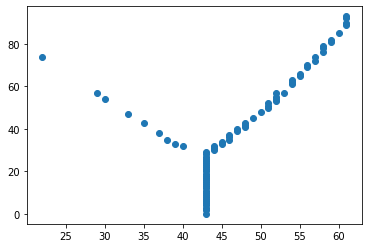

In [104]:
X_pred, H_pred = find_transition_2(Z, 0.0055, 3)
plt.scatter(X_pred, H_pred)
print(len(H_pred))
np.savetxt(p + 'X_pred.dat', X_pred)
np.savetxt(p + 'H_pred.dat', H_pred)

In [43]:
p = 'confusion_learning/results/2d/2020-08-19-14:55:44/'
Z = np.loadtxt(p + 'Z.dat', dtype=float)
H = np.loadtxt(p + 'H.dat', dtype=float)
T = find_transition(Z, pad, H)
np.savetxt(p + 'T.dat', T)
# plt.scatter(T, np.arange(len(H)))
# plt.xlim(xmin=0, xmax = len(H)) 

In [67]:
Th = np.loadtxt('crit_fields_0.33-0.35.dat', dtype=float)
np.ones(Th.shape[0]).reshape(-1,1)
Th

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

### Slices

In [23]:
col =37

Z_cut = Z[:, col]
np.savetxt(path + 'Z_cut.dat', Z_cut)

In [ ]:
Z[2]

In [ ]:
X = np.linspace(0, 1, 50)
H = np.linspace((10 ** 3), 105 * (10 ** 3), 50)
Z = mainloop(X, H, n_thetas=100)
path = 'confusion_learning/results/2d/'
np.savetxt(path + 'X.dat', X)
np.savetxt(path + 'H.dat', H)
np.savetxt(path + 'Z.dat', Z)

In [ ]:
X_params = np.linspace(bounds[0], bounds[1], X_dots_number)
Y_params = np.linspace(bounds[0], bounds[1], Y_dots_number)


Z = np.zeros((X_dots_number, Y_dots_number))
for i, y in enumerate(Y_params):
    Z[:, i] = step_gen(X_params, y, transition=p_true, k=-0.5).reshape(X_dots_number)
                        
np.savetxt('results/t_X_params.dat', X_params)
np.savetxt('results/t_Y_params.dat', Y_params)
np.savetxt('results/t_Z.dat', Z)

In [ ]:
test = np.array([[1,2],[3,4]])
np.savetxt('results/test.dat', test)

In [ ]:
plot_wshape(X_params, Y_params, Z)

In [ ]:
dots_number = 20

X_params = np.linspace(bounds[0], bounds[1], dots_number)
Y_params = np.linspace(bounds[0], bounds[1], dots_number)

print(X_params.shape)

X, Y = np.meshgrid(X_params, Y_params)
Z = []
for i, y in enumerate(Y_params):
    Z.append(step_gen(X_params, y, transition=p_true, k=100))
Z = np.array(Z).reshape(X.shape[0], Y.shape[0])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
# X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z)

plt.show()

In [ ]:
X_dots_number = 100
Y_dots_number = 50
p_true = 0
X_params = np.linspace(bounds[0], bounds[1], X_dots_number)
Y_params = np.linspace(bounds[0], bounds[1], Y_dots_number)


Z = np.zeros((X_dots_number, Y_dots_number))
for i, y in enumerate(Y_params):
    Z[:, i] = step_gen(X_params, y, transition=p_true, k=-1).reshape(X_dots_number)
                        
np.savetxt('results/t_X_params.dat', X_params)
np.savetxt('results/t_Y_params.dat', Y_params)
np.savetxt('results/t_Z.dat', Z)

In [ ]:
X_theory = [-1, -1/2, 0, 1/2, 1]
Y_theory = [1, 0.75, 1, 0.75, 1]
plot_wshape(out,(X_theory, Y_theory), bar_flag=False)

In [ ]:
X_theory = [-1, -3/4, -1/2, 1/4, 1]
Y_theory = [1, 0.75, 1, 0.75, 1]
plot_wshape(out,(X_theory, Y_theory), bar_flag=True)